# 1. 퍼셉트론

## 1.1. 
#### 인공신경망
- 인간의 신경망을 모방한 모델
1. 외부의 전기신호 받아들임 -> 다수의 입력 받아 가중치 적용
2. 모인 신호가 일정 크기 이상 가지면 -> 종합한 값이 일정 기준 넘기면(활성화 함수)
3. 신호 전달 -> output 출력

#### 퍼셉트론
- 초기 형태의 인공신경망
1. 입력값($x_1$) * 가중치($w_1$)
2. 곱한 값의 총합 구하기
3. 총합이 임계값($\theta$) 넘기면 -> 1, 넘지 않으면 -> 0 출력

    -> 훈련(training): 원하는 출력값 내기 위한 가중치 조정 작업
- 임계값과 편향은 표현 차이


## 1.2. 단층 퍼셉트론
: 입력층, 출력층으로만 이뤄진 퍼셉트론
- 입력층: 값을 보낸다
- 출력층: 값을 받아서 출력

#### 논리 게이트(Logic Gate)

> AND 게이트
- 두 개의 입력값이 모두 1 -> 출력값: 1

> NAND 게이트
- 두 개의 입력 값이 1 -> 출력값: 0
- 나머지 입력값 -> 출력값: 1

> OR 게이트
- 두 개의 입력값이 0 -> 출력값: 0
- 나머지 입력값 -> 출력값: 1


#### 단층 퍼셉트론의 한계

- XOR 게이트 구현 불가
    -  XOR 게이트: 서로 다른 값을 가져야 -> 출력값: 1
    - 선형 분류 문제에서 구현 가능하지만 **비선형 영역으로 분리해야할 때는 구현 불가** (XOR 게이트)


## 1.3. 다층 퍼셉트론
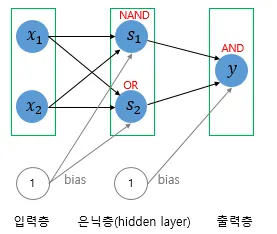
: 입력층, 하나 이상의 은닉층, 출력층으로 이뤄진 퍼셉트론

- AND, NAND, OR 게이트 조합을 통해 XOR 게이트 구성


# 2. 딥러닝 모델의 학습 방법

## 2.1. 순전파, 역전파 
**[학습 알고리즘 기본 구조]**
1. **순전파** 통해 입력값으로부터 예측 수행
2. **오차 계산** 통해 예측 정확도 측정
3. **역전파** 통해 다시 입력층 방향으로 오차 전달
4. **가중치 업데이트**
5. 1~4 반복
-> 오차값이 0에 가까워지게 된다


#### 연쇄 법칙 (Chain Rule)
- 각 단계가 결과에 어떻게, 얼마나 영향 주는지 변수간 상관관계 계산 방법
- 각 은닝층마다 손실에 주는 영향 곱해서 -> 최종 손실에 대한 값 나타냄
- 합성 함수 구성하는 각 함수의 미분의 곱 -> 합성 함수의 미분 표현 가능

#### 기울기 소실 문제
- 은닉층이 많아지면서, 기울기가 0이 되는 문제


## 2.2. 손실 함수 (Loss Function)
- 실제값(정답)과 예측값(출력층의 결과) 차이를 수치화하는 함수

#### 1. 평균 제곱 오차 (MSE)
$$-\frac{1}{N}\sum(y-\hat{y})^2$$
- 회귀 문제에 적합

#### 2. 이진 크로스 엔트로피 (BCE)
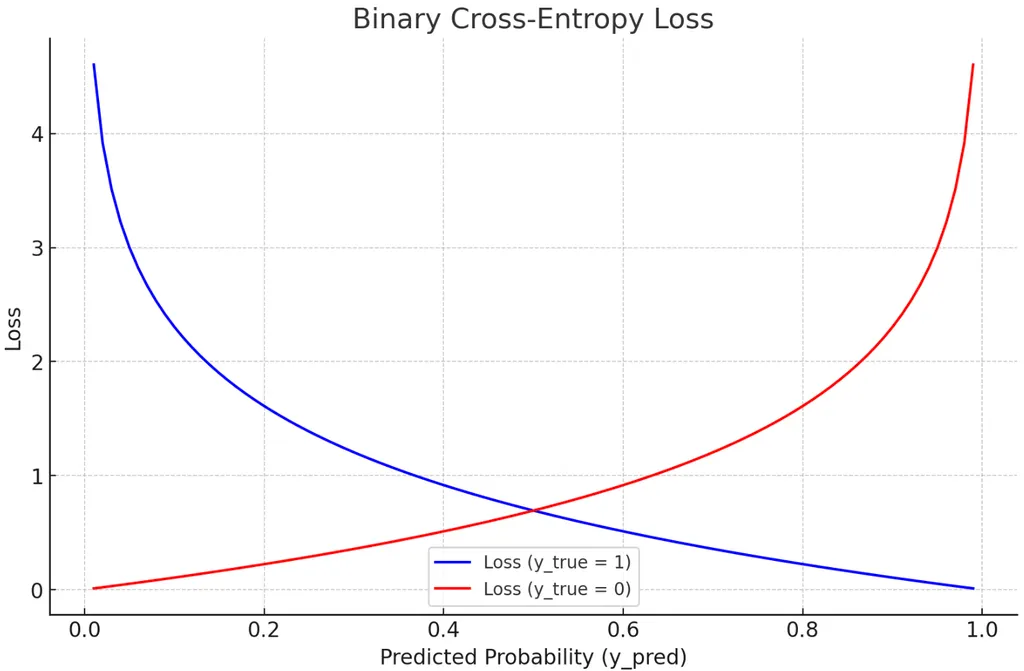
$$L= -(y \log \hat{y} + (1-y) \log(1-\hat{y}))$$
- 이진 분류 문제(로지스틱 회귀)에 사용
- 정답이 1일 때
    - 예측 확률이 0에 가깝다 => 모델이 정답에 확신 X
- 정답이 0일 때
    - 예측 확률이 1에 가깝다 => 모델이 확신을 가지고 틀린 예측 중

#### 3. 크로스 엔트로피 오차 (CEE)
$$-\sum y \log \hat{y}$$
- 다중 클래스 분류 문제에 적합
- 진짜 분포/예측 분포의 유사도 측정에 유용


## 2.3. 활성화 함수 (Activiation Function)
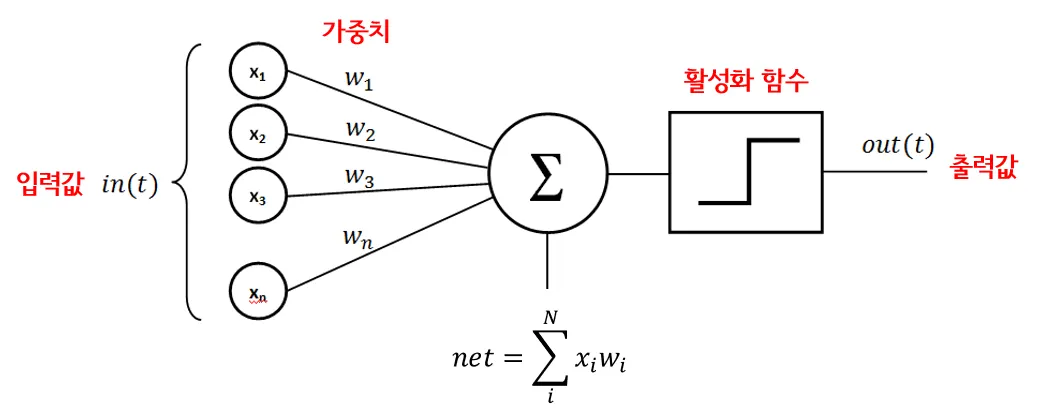
- 비선형성을 만들어줌

#### 1. 계단 함수
- 단층 퍼셉트론
- 입력 신호: 입력값과 가중치의 곱
- 출력 신호: 특정 기준 넘으면 1 or 아니면 0


#### 2. 시그모이드 함수
- 다층 퍼셉트론
- 출력 신호: 0과 1 사이 -> 연속적
- 곡선 형태의 비선형 함수

#### **3. ReLU 힘수**
- 다층 퍼셉트론
- 입력이
    - 0 넘으면 입력값 그대로
    - 0 이하면 0을 출력
- 딥러닝에서 가장 많이 사용

 

#### 4. Tanh 함수
- 시그모이드의 변형형
- 출력 신호: -1과 1 사이

#### 5. Softmax 함수
- 다중 클래스 분류 문제의 활성화 함수
- 출력값이 확률
    - 출력값들의 합은 1


## 2.4. 경사 하강법과 옵티마이저

> ### 경사 하강법

#### 배치 (Batch)
- 매개변수 조정 위해 사용하는 데이터의 묶음
- 배치가 너무 크다 -> 학습 느려짐 & 메모리 부족
- 배치가 너무 작다 -> 가중치가 자주 업데이트되어서 학습 불안정

#### 이포크 (Epoch)
- 모든 데이터셋 학습하는 횟수

#### 이터레이션 or 스텝
- 한번의 이포크 끝내기 위해 필요한 배치의 수


#### 1. 배치 경사 하강법
- 가장 기본적인 경사 하강법
- Batch size = Data size
- 1 Epoch 당 1 업데이트
- 메모리가 많이 필요
- 수렴이 안정적

#### 2. 배치 크기가 1인 확률적 경사 하강법
- 랜덤으로 선택된 하나의 데이터에 대해서만
- 적은 메모리
- 변경폭이 불안정, 정확도가 낮은 편

#### 3. 미니 배치 경사 하강법
- 배치 크기($2^n$) 적절히 지정 -> 매개 변수 값 조정
- 가장 많이 사용되는 경사 하강법

> ### 옵티마이저

#### 1. 모멘텀
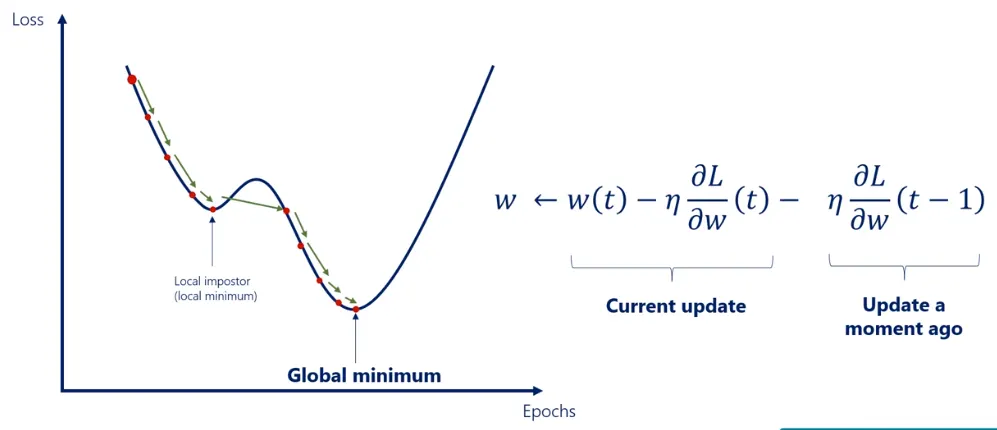
- 경사 하강법 + 관성
- 바로 전 시점의 접선의 기울기 값의 일정 비율만큼을 접선의 기울기에 반영영

#### 2. RMSProp
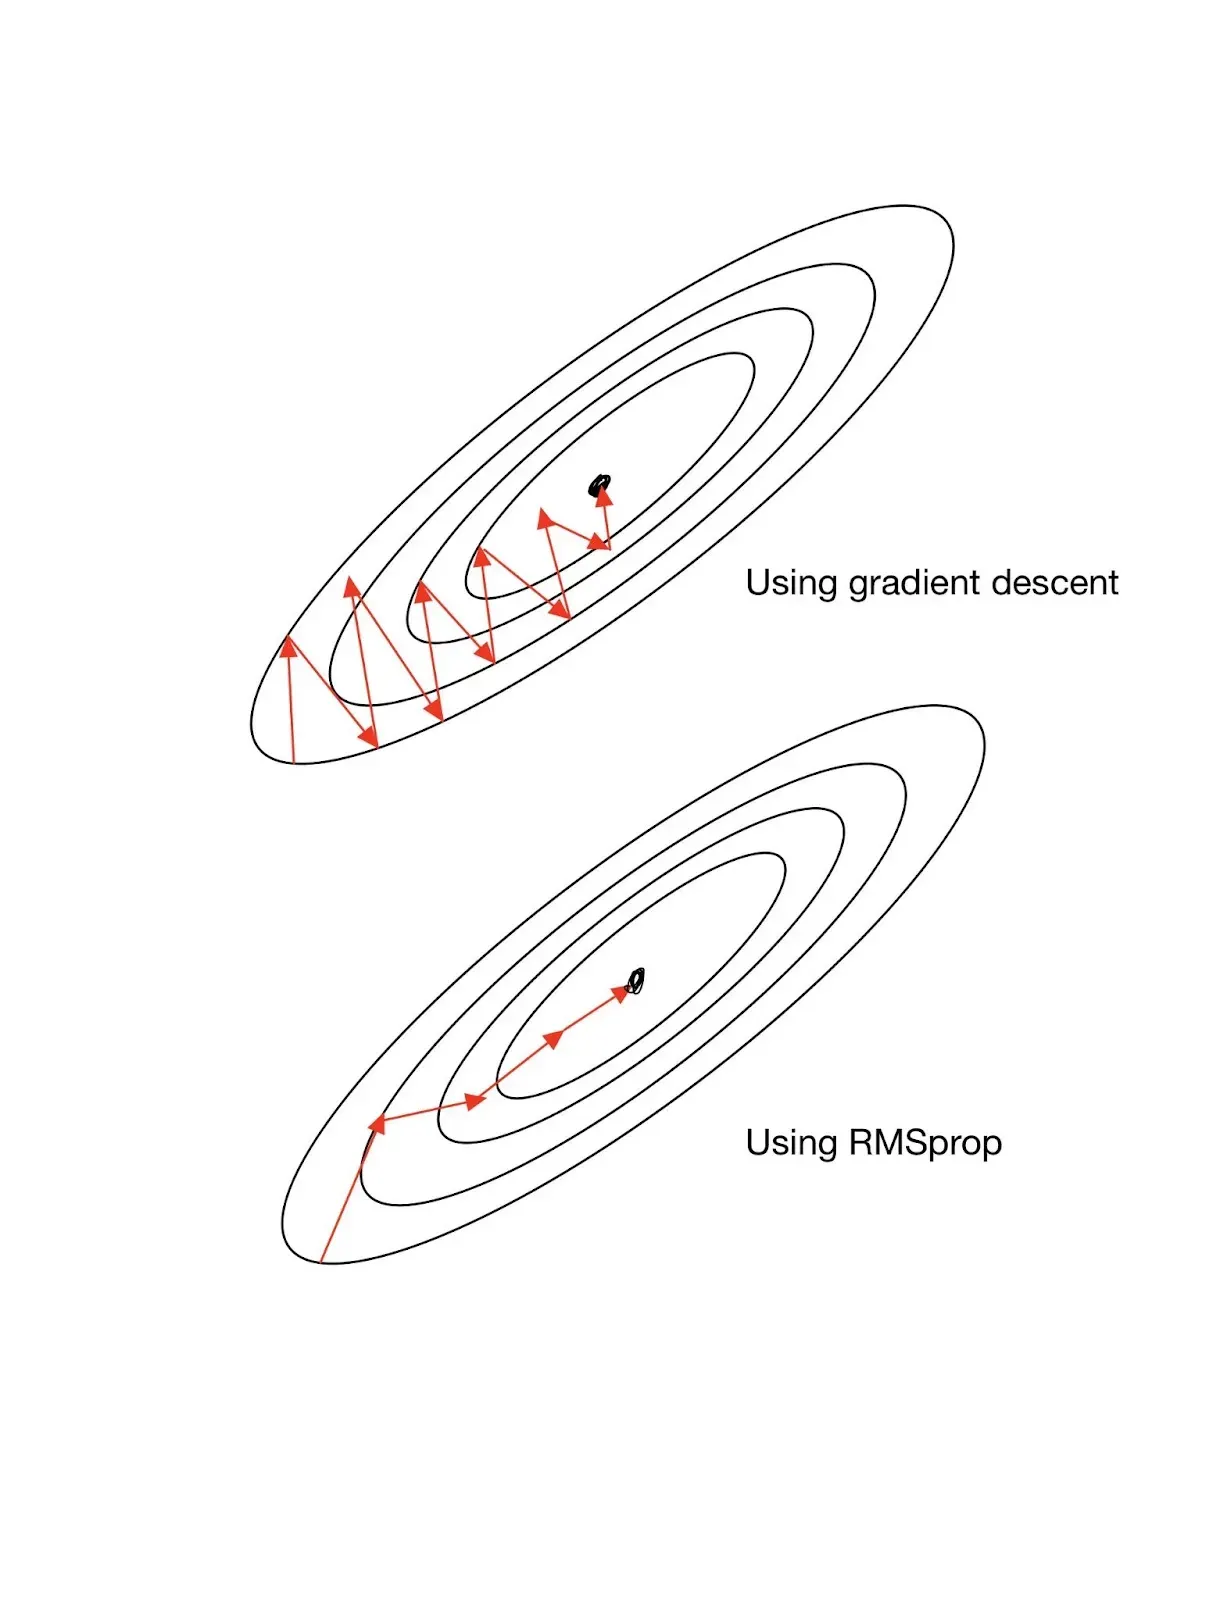
- 속도 개념을 추가
- 급한 경사 -> 속도 줄이고
- 완만한 경사 -> 속도 유지하거나 증가

#### 3. Adam
- 방향과 학습률(스텝 사이즈) 모두 활용
- 1차 모멘트(기울기의 평균) & 2차 모멘트(기울기의 제곱 평균) 활용하여 학습률 조정


## 2.5. 학습 향상 기법: 데이터 증강과 전이학습

> ### 데이터 증강
- 기존 데이터에서 변형을 줘서 학습 데이터 늘리기
- 장점
    - 모델의 성능 향상
    - 데이터 의존성 감소
    - 과적합 완화
    - 데이터 프라이버시 보호

> ### 전이 학습
- 한 문제에서 학습한 지식을 다른 문제에서 활용 -> 모델의 성능 향상!
- 장점
    - 계산 비용 절감
    - 데이터셋 크기 문제 완화
    - 일반화 가능성 향상
    - 성능 향상

> #### 전체적인 워크 플로우
1. Pre-trained model
    - 일반적 특징 학습
    - 이미 큰 데이터셋으로 학습한 모델
2. Fine-tuning 
    - Pre-trained model을 새로운 데이터셋에 맞춰 재학습

# 3. 합성곱 신경망 (CNN)

### CNN 개념 설명
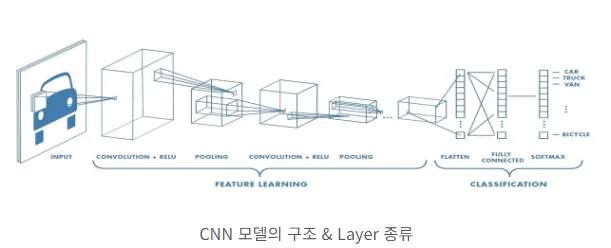
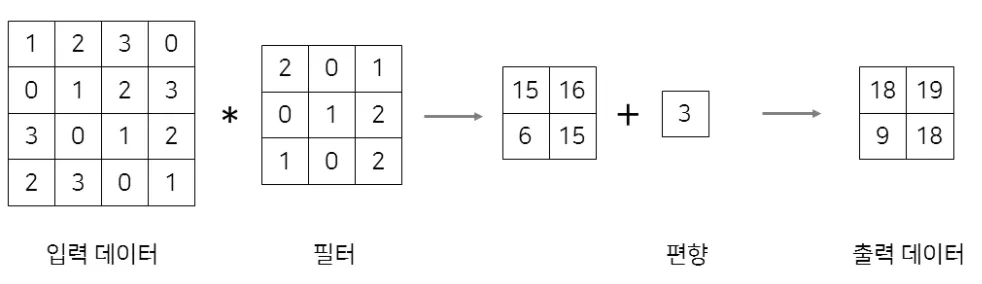
- 컴퓨터는 픽셀 단위로 구분해서 이해한다
- 이때 그냥 학습하면 순서가 뒤섞인 채로 학습하게 되기 때문에
- 공간 정보를 유지한 채로 학습 -> **CNN**

## 3.1 MLP가 아닌 왜 CNN?
1. 위치, 크기, 회전 등의 변화에 취약
    - CNN에서는 
        - convolution으로 특징 추출
        - Pooling으로 차원 축소
    - 해당 영역에 어떤 특징이 있는지에 집중
2. 파라미터 폭발
    - CNN에서는
        - 부분 연결 구조
        - Convolution 연산
    - 으로 특정 피쳐에만 집중
3. 공간 정보 손실
    - CNN에서는
        - 공간 정보 보존하며 학습
        - 특징 어느 정도 추출 후 flatten
    - 손실 정도가 낮음

## 3.2 합성곱과 풀링
- 이미지 특징 추출 방법
- 공간적 관계 & 지역적 패턴 중요
- CNN 모델 구조
    1. 특징 추출 - Convolution, Pooling
    2. 클래스 분류 - Fully Connected Layer

####  1. Convolutoin Layer
- 전체 이미지를 일정 크기의 필터로 훑으면서 특징 학긋ㅂ
    1. 필터 또는 커널이 이미지 위 슬라이딩
    2. 각 위치에서 요소별 곱셈 후 합계 계산
    3. 결과를 Feature Map에 저장

#### 2. Padding
- filter를 거치며 정보 손실 막기 위해 이미지 바깥을 0으로 둘러쌈

#### 3. Stride (보폭)
- 이미지 몇 칸씩 점프하면서 훑을 것인지 결정하는 값
- 보폭이 커질수록 feature map 크기 작아짐

#### 4. Pooling
- 이미지 분할 후, 해당 영역에서 가장 큰 값(Max Pooling) or 평균값(Average Poolilng) 취해 특징 추출


## 3.3 대표적인 CNN 아키텍처

#### AlexNet (2012)
- 최초로 GPU 이용해 학습한 대규모 CNN 모델
- ReLU 함수 -> 기울기 소실 문제 해소

#### VGGNet (2014)
- 이미지 인식에 강한 깊은 층의 CNN 모델
- 전이 학습에 많이 사용

#### ResNet (2015)
- 잔차 연결 개념 도입 -> 깊은 신경망의 소실 문제 해결
    - 잔차 연결: 이전 레이어 출력을 몇 레이어 건너뛰고 다음 레이어의 입력으로 직접 추가하는 방식
    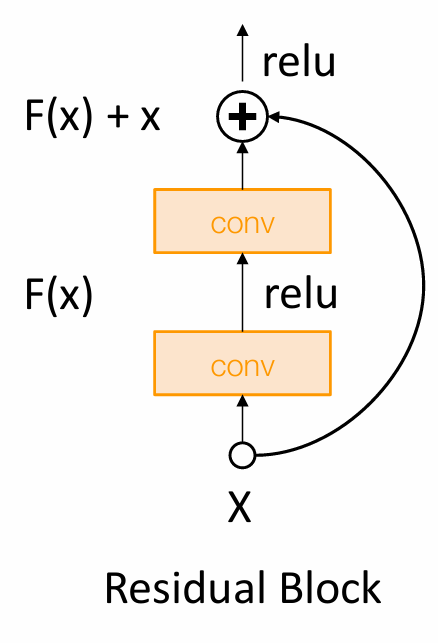
- 현재 많은 모델의 기반

# 4. 이미지 딥러닝 응용

## 4.1 이미지 분류
- 아이디어
    - 이미지를 수치 데이터(픽셀 값)로 인식 -> 사전 정의된 클래스 중 하나로 분류
- 대표 모델
    - AlexNet
    - VGG
    - ResNet
    - Vision Transformer


## 4.2 객체 탐지
- 아이디어
    - bounding box를 찾는 작업
- 모델 적용 방식
    - CNN 통해 Feature Map 얻고, 두 head를 올림
        - Calssfication Head: 객체의 클래스 예측
        - Regression Head: 객체의 위치 좌표 예측
- 대표 모델: YOLO, Faster, R-CNN, SSD 등

## 4.3 이미지 캡셔닝
- 아이디어
    - 객체에 대한 판단, 객체들 간 관계 파악후 자연어 형태로 표현
- 모델 적용 방식
    - 이미지 특징 추출을 위한 CNN & 문장으로 나타내기 위한 RNN
- 이미지 캡셔닝 단계
    - CNN 이용한 특징 추출
    - Attention Network 이용한 단어 생성
    - RNN 이용하여 문장 완성
